# The Titanic Problem Notebook
# 1. Einleitung
## 1.1 Import der Module & Benennung des Datensets 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic_data = pd.read_csv(r'..\titanic.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 1.2 Dateneigenschaften

In [2]:
# In welchen Formaten liegen die Daten vor?
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 1.3 Datenbeschreibung

In [3]:
# Welche Daten haben numerische, welche kategorische Werte?
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# In den Spalten 'Cabin' und 'Embarked' gibt es NaN-Werte, die vorher nicht berücksichtigt wurden,
titanic_data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [5]:
# Suche nach weiteren fehlenden Werten im Datensatz: 
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2. Datenerfassung & Beobachtungen
Der Datensatz umfasst *12 Spalten* und 891 Zeilen mit Informationen zu Passagieren der Titanic. Anbei eine kurze Übersicht der Spalten und der hinterlegten Informationen. (Für eine ausführlichere Variante ist die README-Datei des Projekts zu konsultieren.)

**1. 'PassengerId'** Enthält die PassagierId als Integer. Die hinterlegten Zahlen stehen für die IDs und reichen von 1 - 891.

**2. 'Survived'** Enthält den Überlebensstatus als Integer. 0 = hat nicht überlebt. 1 = hat überlebt.

**3. 'Pclass'** Enthält die Passagierklasse als Integer. Die Zahlen der unterschiedlichen Klassen reichen von 1 - 3.  

**4. 'Name'** Enthält die Anreden, Nachname, Vornamen und ggf. Mädchenname.

**5. 'Sex'** Enthält das Geschlecht des Passagiers als String. Entweder 'female' für weiblich oder 'male' für männlich.

**6. 'Age'** Enthält das Alter des Passagiers in Jahren als Float. Das kleinste Alter liegt bei 0.42 das größte bei 80.0.

**7. 'SibSp'** Enthält die Anzahl der Geschwister und/oder der Ehepartner als Integer.

**8. 'Parch'** Enthält die Anzahl der Elternteile und/oder der Kinder als Integer. Die Werte reichen von 0 - 3.

**9. 'Ticket'** Enthält Ticketnamen als String.

**10. 'Fare'** Enthält den Ticketpreis als Float mit 4 Nachkommastellen. Die Währung ist nicht angegeben.

**11. 'Cabin'** Enthält den Namen der Kabine des Passagiers als String. Setzt sich zusammen aus Buchstaben und Zahlenfolge.

**12 'Embarked'** Enthält den Ort, an dem der Passagier zugestiegen ist als String. S = Southampton (England), C = Cherbourg (Frankreich), Q = Queenstown (Irland).

# 3. Datenbereinigung 


## 3.1 Bearbeitung der Spalte "Name"

### 3.1.1 Special Case: Noël Leslie, Countess of Rothes 

In [6]:
# Bei der Bereinigung der Namensspalte gab es einen Namen, der das einfache Trennen verhindert hat.
titanic_data.iloc[759]

PassengerId                                                  760
Survived                                                       1
Pclass                                                         1
Name           Rothes, the Countess. of (Lucy Noel Martha Dye...
Sex                                                       female
Age                                                         33.0
SibSp                                                          0
Parch                                                          0
Ticket                                                    110152
Fare                                                        86.5
Cabin                                                        B77
Embarked                                                       S
Name: 759, dtype: object

In [7]:
# 'of ' wird aus dem Passagiernamen gestrichen, da er sonst als Vorname aufgeführt wird.
rothes = titanic_data[titanic_data['Name'].str.contains('Rothes')]
titanic_data.loc[rothes.index,'Name'] = rothes['Name'].str.replace(r'of ', repl='', regex=True)

In [8]:
titanic_data.loc[rothes.index,'Name']

759    Rothes, the Countess. (Lucy Noel Martha Dyer-E...
Name: Name, dtype: object

### 3.1.2 Trennung der Namen zu 'Surname' und 'Name'

In [9]:
titanic_index = pd.Index(titanic_data.columns)

In [10]:
names_df = titanic_data['Name'].str.split(', ', n=1, expand=True)
titanic_data.insert(titanic_index.get_loc('Name'), 'Surname', names_df[0])
titanic_data.insert(titanic_index.get_loc('Name'), 'name', names_df[1])


In [11]:
del titanic_data['Name']
titanic_data.rename({'name': 'Name'}, axis=1, inplace=True)

In [12]:
titanic_data[['Surname', 'Name']]

,Surname,Name
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
...,...,...
886,Montvila,Rev. Juozas
887,Graham,Miss. Margaret Edith
888,Johnston,"Miss. Catherine Helen ""Carrie"""
889,Behr,Mr. Karl Howell


### 3.1.3 Trennung der Namen in 'Address' und 'First Name'

In [13]:
names_df = titanic_data['Name'].str.split(r'\. ', n=1, regex=True, expand=True)
titanic_data.insert(titanic_index.get_loc('Name'),'Address', names_df[0])
titanic_data['Name'] = titanic_data['Name'].str.replace(r'^[^.]*\.', '', regex=True)

In [14]:
titanic_data['Address'].value_counts()

Address
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

### 3.1.4 Trennung der Mädchennamen zu 'Name' und 'Maiden Name'

In [15]:
titanic_index = pd.Index(titanic_data.columns)

In [16]:
names_df = titanic_data['Name'].str.extract(r'\((.*?)\)', expand=False)
#old_names_df = titanic_data['Name'].str.split(r'\(', regex=True, expand=True)
titanic_data.insert(titanic_index.get_loc('Name') + 1, column='Maiden Name', value=names_df)

In [17]:
titanic_data

,PassengerId,Survived,Pclass,Address,Name,Maiden Name,Surname,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,Owen Harris,NaN,Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,John Bradley (Florence Briggs Thayer),Florence Briggs Thayer,Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,Laina,NaN,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,Jacques Heath (Lily May Peel),Lily May Peel,Futrelle,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,William Henry,NaN,Allen,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,Juozas,NaN,Montvila,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Miss,Margaret Edith,NaN,Graham,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,Miss,"Catherine Helen ""Carrie""",NaN,Johnston,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Mr,Karl Howell,NaN,Behr,male,26.0,0,0,111369,30.0000,C148,C


## 3.2 Mitgereiste Familienmitglieder

In [18]:
titanic_data['Fam'] = titanic_data["SibSp"] + titanic_data["Parch"]

In [19]:
titanic_data[['Fam','Survived']]

,Fam,Survived
0,1,0
1,1,1
2,0,1
3,1,1
4,0,0
...,...,...
886,0,0
887,0,1
888,3,0
889,0,1


## 3.3 Aufteilung der Kabinen & Ergänzung fehlender Werte

In [20]:
cabin_df = titanic_data['Cabin']
pattern = r'([A-Z]?).*'
titanic_data['Cabin_Loc'] = cabin_df.str.extract(pattern, expand=True)

In [21]:
# Um später Aussagen über fehlende Kabinenangaben machen zu können, wir ein Wert 'N' für die Nan-Werte der Kabinenspalte genutzt.
titanic_data['Cabin_Loc'] = titanic_data['Cabin_Loc'].fillna('N')

In [22]:
titanic_data['Cabin_Loc'].value_counts().sort_index()

Cabin_Loc
A     15
B     47
C     59
D     33
E     32
F     13
G      4
N    687
T      1
Name: count, dtype: int64

# 4. Datenanalyse

## 4.1 Überlebensrate insgesamt


In [23]:
survival_rate = titanic_data['Survived'].mean()
print(f"Die Überlebensrate beträgt: {survival_rate:.2f}")

Die Überlebensrate beträgt: 0.38


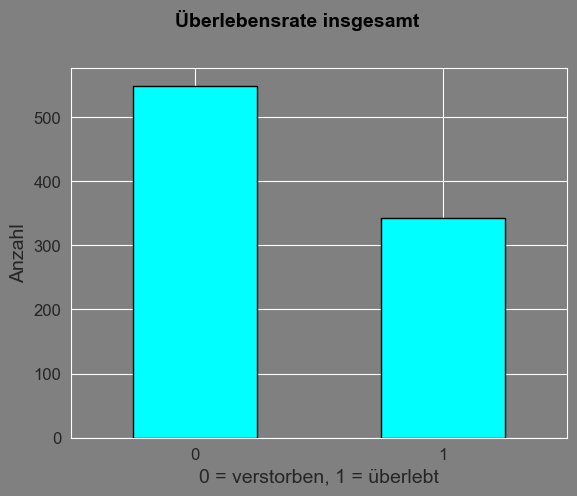

In [24]:
survival_counts = titanic_data['Survived'].value_counts()

fig_survived, ax_survived = plt.subplots()
survived_plot = survival_counts.plot(kind='bar',
                                     color='#00FFFF',
                                     ec='black',
                                     lw=1,
                                     xlabel='0 = verstorben, 1 = überlebt', 
                                     fontsize=12,
                                     ylabel='Anzahl',
                                     rot=0,
                                     )

survived_plot.set_facecolor('grey')
fig_survived.patch.set_facecolor('grey')

survived_plot.set_title('Überlebensrate insgesamt',
                        fontsize=14,
                        color='black', 
                        fontweight='bold',
                        pad=30,
                        loc='left', 
                        x=0.21,
                        )

ax_survived.set_xlabel('0 = verstorben, 1 = überlebt', 
                       fontsize=14
                       )
ax_survived.set_ylabel('Anzahl', 
                       fontsize=14
                       )
plt.show()

## 4.2 Überlebensrate nach Passagierklasse (Pclass) und Kabine (Cabin)

### 4.2.1 Überlebensrate nach Passagierklasse

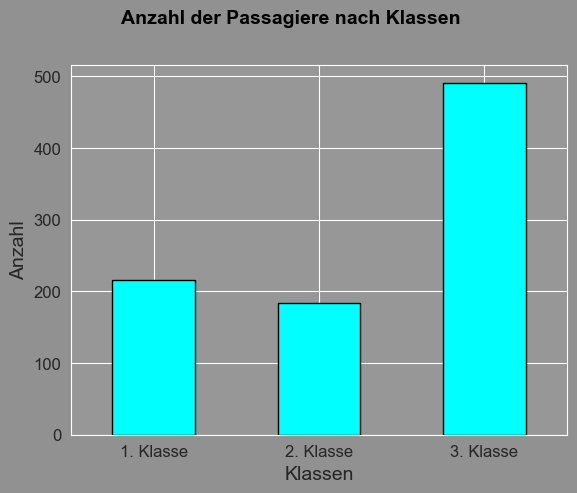

Anzahl nach Passagierklasse:
Pclass
1    216
2    184
3    491
Name: count, dtype: int64


In [25]:
classes_order = titanic_data['Pclass'].value_counts().reindex([1, 2, 3])

fig_classes_order, ax_classes_order = plt.subplots()

classes_order.plot(kind='bar',
                   color='#00FFFF',  
                   ec='black',
                   lw=1, 
                   fontsize=12,
                   ax=ax_classes_order,
                   rot=0,
                   )  

ax_classes_order.set_facecolor('#989797')  
fig_classes_order.patch.set_facecolor('#929191')

ax_classes_order.set_title('Anzahl der Passagiere nach Klassen', 
                           fontsize=14,
                           color='black',
                           fontweight='bold',
                           pad=30,
                           loc='left', 
                           x=0.1,
                           )

ax_classes_order.set_xlabel('Klassen', 
                            fontsize=14
                            )
ax_classes_order.set_ylabel('Anzahl', 
                            fontsize=14
                            )

plt.xticks([0, 1, 2], ['1. Klasse', '2. Klasse', '3. Klasse'])

plt.show()
print(f"Anzahl nach Passagierklasse:\n{classes_order}")

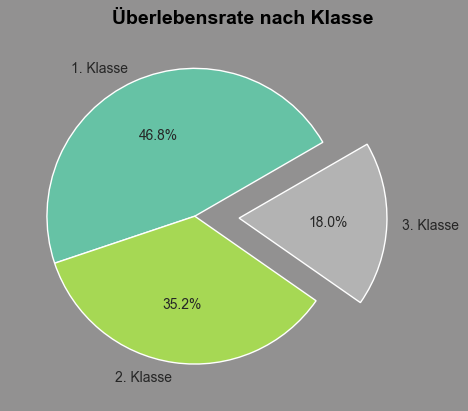

Überlebensrate nach Passagierklasse:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [26]:
survived_by_class = titanic_data.groupby('Pclass')['Survived'].mean()

fig, ax = plt.subplots()

survived_by_class.plot(kind='pie',
                       labels=['1. Klasse', '2. Klasse', '3. Klasse'],
                       explode=(0,0,0.3),
                       autopct='%1.1f%%',
                       startangle=30,
                       cmap='Set2',
                       ylabel='',
                       )

fig.patch.set_facecolor('#929191')
title = ax.set_title('Überlebensrate nach Klasse',
                     fontsize=14,
                     color='black',
                     fontweight='bold',
                     )
                           
title.set_position([0.63, 1.0])

plt.show()

print(f"Überlebensrate nach Passagierklasse:\n{survived_by_class}")

### 4.2.2 Überlebensrate nach Passagierklasse

In [27]:
cabin_survived_rate = titanic_data.groupby('Cabin_Loc')['Survived'].agg(['mean', 'count', 'sum'])
print(cabin_survived_rate)
print(f"Von {len(titanic_data)} Einträgen im Datensatz hatten nur {titanic_data['Cabin'].count()} eine Kabinenangabe.") 

               mean  count  sum
Cabin_Loc                      
A          0.466667     15    7
B          0.744681     47   35
C          0.593220     59   35
D          0.757576     33   25
E          0.750000     32   24
F          0.615385     13    8
G          0.500000      4    2
N          0.299854    687  206
T          0.000000      1    0
Von 891 Einträgen im Datensatz hatten nur 204 eine Kabinenangabe.


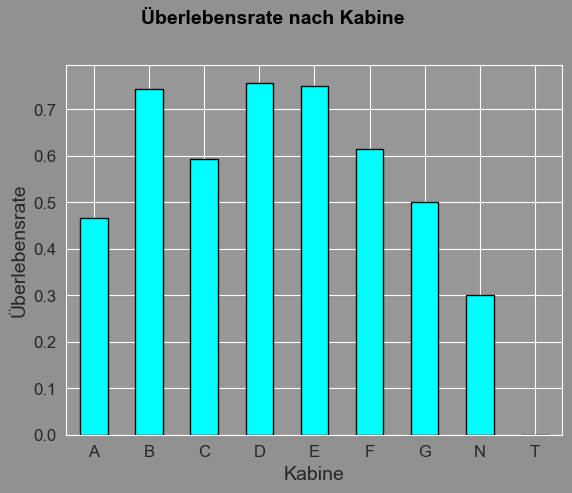

Überlebensrate nach Kabine:
Cabin_Loc
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
N    0.299854
T    0.000000
Name: Survived, dtype: float64


In [28]:
cabin_survived = titanic_data.groupby('Cabin_Loc')['Survived'].mean()

fig_cabin_survival, ax_cabin_survival = plt.subplots()

cabin_survival_plot = cabin_survived.plot(kind='bar',
                                          color='#00FFFF',
                                          ec='black',
                                          lw=1,
                                          fontsize=12,
                                          rot=0,
                                          )

ax_cabin_survival.set_facecolor('#989797')  
fig_cabin_survival.patch.set_facecolor('#929191')

cabin_survival_plot.set_title('Überlebensrate nach Kabine',
                              fontsize=14,
                              color='black',
                              fontweight='bold',
                              pad=30,
                              loc='left', 
                              x=0.15,
                              )

ax_cabin_survival.set_xlabel('Kabine', 
                             fontsize=14,
                             )
ax_cabin_survival.set_ylabel('Überlebensrate', 
                             fontsize=14,
                             )

plt.show()
print(f"Überlebensrate nach Kabine:\n{cabin_survived}")

### 4.3 Überlebensrate nach Geschlecht

In [29]:
survived_women = titanic_data.loc[titanic_data.Sex == 'female']["Survived"]
survived_men = titanic_data.loc[titanic_data.Sex == 'male']["Survived"]

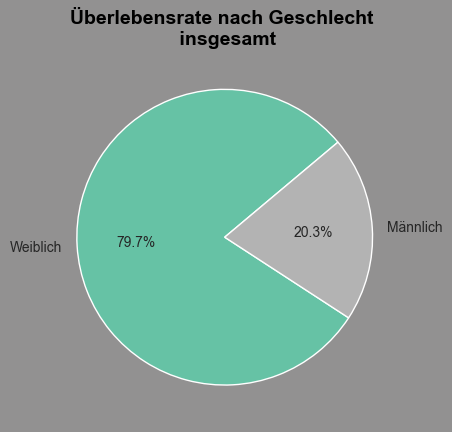

In [30]:
survival_by_gender = titanic_data.groupby('Sex')['Survived'].mean()

sex_fig, sex_ax = plt.subplots()

survival_by_gender_plot = survival_by_gender.plot(kind='pie',
                                                  labels=['Weiblich', 'Männlich'],
                                                  explode=(0,0),
                                                  autopct='%1.1f%%',
                                                  startangle=40,
                                                  cmap='Set2',
                                                  ylabel='',
                                                  )

sex_fig.patch.set_facecolor('#929191')

survival_by_gender_plot.set_title('Überlebensrate nach Geschlecht \n insgesamt', 
                                  fontsize=14,
                                  color='black',
                                  fontweight='bold',
                                  )

plt.show()

In [31]:
print(f" Anhand des Datensatzes waren {survived_women.size} Frauen und {survived_men.size} Männer an Bord der Titanic. Insgesamt haben von allen Frauen an Bord {sum(survived_women)} überlebt ({(sum(survived_women) / survived_women.size)*100:.2f} %) und von allen Männern {sum(survived_men)} ({(sum(survived_men) / survived_men.size)*100:.2f} %).")

 Anhand des Datensatzes waren 314 Frauen und 577 Männer an Bord der Titanic. Insgesamt haben von allen Frauen an Bord 233 überlebt (74.20 %) und von allen Männern 109 (18.89 %).


## 4.4 Überlebensrate nach Alter

### 4.4.1 Altersverteilung der Passagiere

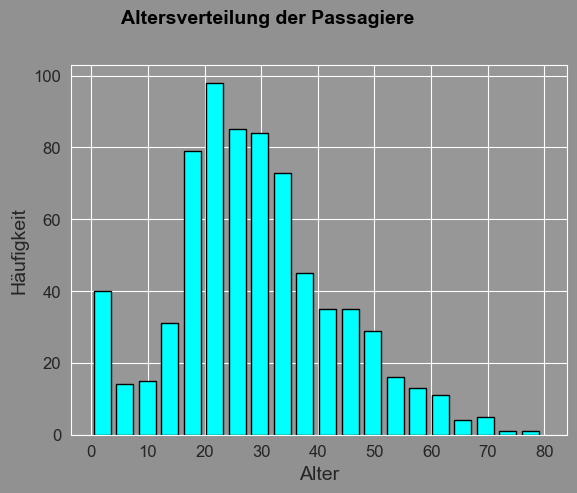

In [32]:
age_fig, age_ax = plt.subplots()

age_survived_plot = titanic_data['Age'].plot(kind='hist',
                                             color='#00FFFF',
                                             ec='black',
                                             lw=1,
                                             fontsize=12,
                                             bins=20,
                                             width=3,
                                             rot=0,
                                             )

age_fig.patch.set_facecolor('#929191')

age_ax.set_facecolor('#989797')  

age_survived_plot.set_title('Altersverteilung der Passagiere', 
                            fontsize=14,
                            color='black',
                            fontweight='bold',
                            pad=30,
                            loc='left', 
                            x=0.1,
                            )

age_ax.set_xlabel('Alter',
              fontsize=14,
              )
age_ax.set_ylabel('Häufigkeit',
              fontsize=14,
              )

plt.show()

### 4.4.2 Überlebensrate nach Altersverteilung

In [33]:
age_bins = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
titanic_data['AgeBins'] = pd.cut(titanic_data['Age'], range(0, 100, 10), labels=age_bins)
age_bins_df = titanic_data.groupby('AgeBins')['Survived'].agg(['mean', 'count', 'sum'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_17072\845224632.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bins_df = titanic_data.groupby('AgeBins')['Survived'].agg(['mean', 'count', 'sum'])


In [34]:
print(age_bins_df)

             mean  count  sum
AgeBins                      
1-10     0.593750     64   38
11-20    0.382609    115   44
21-30    0.365217    230   84
31-40    0.445161    155   69
41-50    0.383721     86   33
51-60    0.404762     42   17
61-70    0.235294     17    4
71-80    0.200000      5    1
81-90         NaN      0    0


In [35]:
deceased = titanic_data[titanic_data['Survived'] == 0]['Age']
survived = titanic_data[titanic_data['Survived'] == 1]['Age']

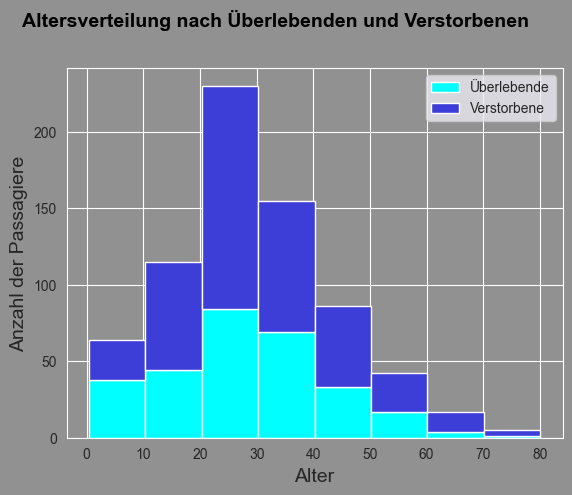

In [36]:
fig_survived, ax_survived = plt.subplots()

plt.hist([survived, deceased],
         bins=8,
         stacked=True,
         color=['#00FFFF', '#3D3DD7'],
         ec='white',
         lw=1,
         )

ax_survived.set_facecolor('#929191')
fig_survived.set_facecolor('#929191')

ax_survived.tick_params(axis='x', color='#929191')
ax_survived.tick_params(axis='y', color='#929191')

ax_survived.set_xlabel('Alter')
ax_survived.set_ylabel('Anzahl der Passagiere')

ax_survived.set_xlabel('Alter', 
                       fontsize=14,
                       )
ax_survived.set_ylabel('Anzahl der Passagiere', 
                       fontsize=14,
                       )

plt.title('Altersverteilung nach Überlebenden und Verstorbenen', 
          color='black', 
          fontsize=14, 
          pad=30,
          loc='left',
          x=-0.09,
          fontweight='bold',
          )

plt.legend(['Überlebende', 'Verstorbene'])

plt.show()

## 4.5 Überlebensrate von Passagieren mit Angehörigen

### 4.5.1 verheiratete und unverheiratete Frauen

In [37]:
titanic_data[(titanic_data['Address'].str.contains('Mrs')) | (titanic_data['Address'].str.contains('Miss'))]

,PassengerId,Survived,Pclass,Address,Name,Maiden Name,Surname,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fam,Cabin_Loc,AgeBins
1,2,1,1,Mrs,John Bradley (Florence Briggs Thayer),Florence Briggs Thayer,Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,31-40
2,3,1,3,Miss,Laina,NaN,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,N,21-30
3,4,1,1,Mrs,Jacques Heath (Lily May Peel),Lily May Peel,Futrelle,female,35.0,1,0,113803,53.1000,C123,S,1,C,31-40
8,9,1,3,Mrs,Oscar W (Elisabeth Vilhelmina Berg),Elisabeth Vilhelmina Berg,Johnson,female,27.0,0,2,347742,11.1333,NaN,S,2,N,21-30
9,10,1,2,Mrs,Nicholas (Adele Achem),Adele Achem,Nasser,female,14.0,1,0,237736,30.0708,NaN,C,1,N,11-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,Mrs,William (Imanita Parrish Hall),Imanita Parrish Hall,Shelley,female,25.0,0,1,230433,26.0000,NaN,S,1,N,21-30
882,883,0,3,Miss,Gerda Ulrika,NaN,Dahlberg,female,22.0,0,0,7552,10.5167,NaN,S,0,N,21-30
885,886,0,3,Mrs,William (Margaret Norton),Margaret Norton,Rice,female,39.0,0,5,382652,29.1250,NaN,Q,5,N,31-40
887,888,1,1,Miss,Margaret Edith,NaN,Graham,female,19.0,0,0,112053,30.0000,B42,S,0,B,11-20


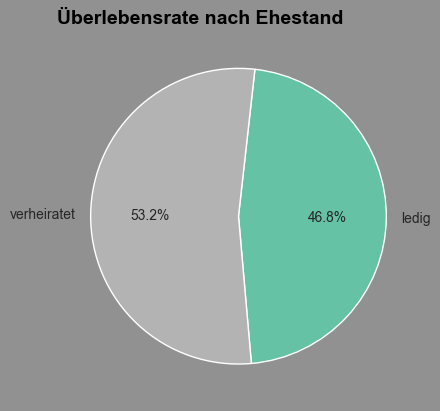

Address
Miss    0.697802
Mrs     0.792000
Name: Survived, dtype: float64


In [38]:
married = titanic_data[(titanic_data['Address'].str.contains('Mrs')) | (titanic_data['Address'].str.contains('Miss'))]
survived_by_married = married.groupby('Address')['Survived'].mean()

married_fig, married_ax = plt.subplots()

survived_by_married.plot(kind='pie',
                         labels= ['ledig', 'verheiratet'],
                         explode=(0, 0),
                         autopct='%1.1f%%',
                         startangle=275,
                         cmap='Set2',
                         ylabel= '',
                         )

married_fig.patch.set_facecolor('#929191')

married_ax.set_title('Überlebensrate nach Ehestand',
             fontsize=14,
             color='black',
             fontweight='bold',
             loc='left',
             x=0.01,
             )

plt.show()
print(f'{survived_by_married}')

### 4.5.2 Überlebensrate von Passagieren mit Geschwistern/Ehepartnern an Bord

In [39]:
survived_with_siblings_spouse = titanic_data.groupby('SibSp')['Survived'].mean()

In [40]:
survived_with_siblings_spouse = survived_with_siblings_spouse.drop([5, 8], axis=0)

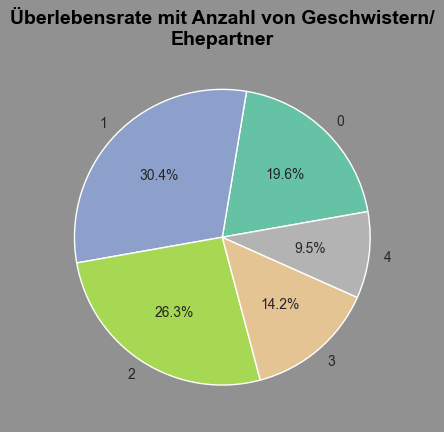

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
Name: Survived, dtype: float64


In [41]:
sibsp_fig, sibsp_ax = plt.subplots()

survived_with_siblings_spouse.plot(kind='pie',
                                   autopct='%1.1f%%',
                                   startangle=10,
                                   cmap='Set2',
                                   ylabel='',
                                   )

sibsp_fig.patch.set_facecolor('#929191')

sibsp_ax.set_title('Überlebensrate mit Anzahl von Geschwistern/\nEhepartner', 
             fontsize=14,
             color='black',
             fontweight='bold',
             )

plt.show()
print(f'{survived_with_siblings_spouse}')

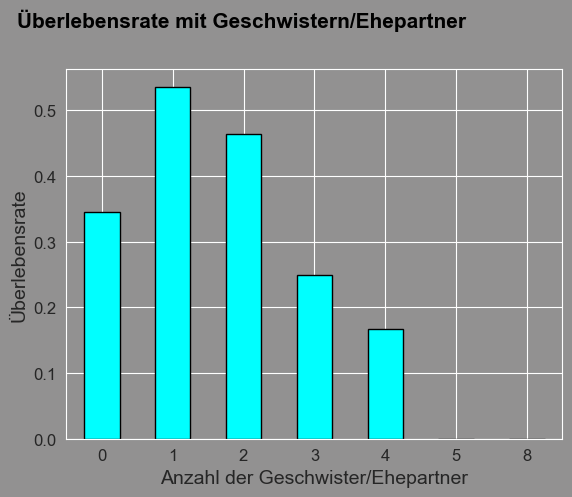

In [42]:
survival_with_siblings_spouse = titanic_data.groupby('SibSp')['Survived'].mean()

sibsp_fig, sibsp_ax = plt.subplots()

survival_with_siblings_spouse_plot = survival_with_siblings_spouse.plot(kind='bar',
                                                                        color='#00FFFF',
                                                                        ec='black',
                                                                        lw=1,
                                                                        fontsize=12,
                                                                        rot=0,
                                                                        )

sibsp_fig.patch.set_facecolor('#929191')

survival_with_siblings_spouse_plot.set_facecolor('#929191')

survival_with_siblings_spouse_plot.set_xlabel('Anzahl der Geschwister/Ehepartner',fontsize=14)

survival_with_siblings_spouse_plot.set_ylabel('Überlebensrate', fontsize=14)

sibsp_ax.set_title('Überlebensrate mit Geschwistern/Ehepartner',
                                             fontsize=15,
                                             pad=30,
                                             color='black',
                                             fontweight='bold',
                                             loc='left',
                                             x= -0.1)

plt.show()

### 4.5.3 Überlebensrate von Passagieren mit Familienangehörigen an Bord

In [43]:
survival_with_fam = titanic_data.groupby('Fam')['Survived']
survival_with_fam.agg(['mean', 'count', 'sum'])

,mean,count,sum
Fam,,,
0,0.303538,537,163
1,0.552795,161,89
2,0.578431,102,59
3,0.724138,29,21
4,0.200000,15,3
5,0.136364,22,3
6,0.333333,12,4
7,0.000000,6,0
10,0.000000,7,0


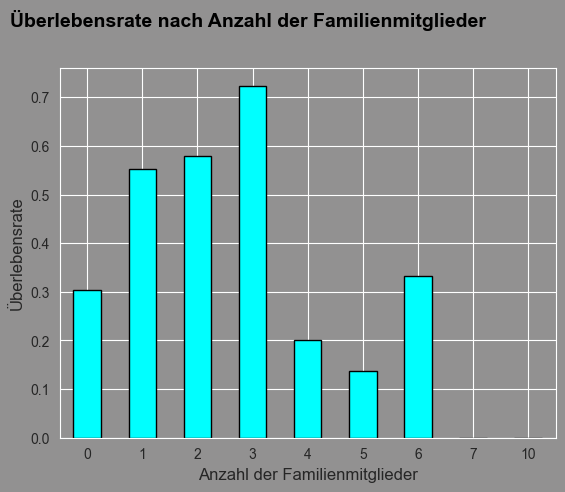

In [44]:
survival_with_fam = titanic_data.groupby('Fam')['Survived'].mean()

fig, ax = plt.subplots()

survived_with_fam_plot = survival_with_fam.plot(kind='bar',
                                               color='#00FFFF',
                                               ec='black',
                                               lw=1,
                                               rot=0,
                                               ax=ax
                                               )

fig.patch.set_facecolor('#929191')

ax.set_facecolor('#929191')

ax.set_xlabel('Anzahl der Familienmitglieder', 
              fontsize=12
              )
ax.set_ylabel('Überlebensrate', 
              fontsize=12
              )

survived_with_fam_plot.set_title('Überlebensrate nach Anzahl der Familienmitglieder',
                                fontsize=14,
                                pad=30,
                                color='black', 
                                fontweight='bold',
                                loc='left',
                                x= -0.1
                                )

plt.show()

# 5. Korrelation und Überlebenswahrscheinlichkeit

In [45]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fam
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


In [46]:
corr_mat = titanic_data[['Survived', 'Age', 'SibSp', 'Parch', 'Fam', 'Pclass', 'Fare', 'Sex']]
corr_mat


,Survived,Age,SibSp,Parch,Fam,Pclass,Fare,Sex
0,0,22.0,1,0,1,3,7.2500,male
1,1,38.0,1,0,1,1,71.2833,female
2,1,26.0,0,0,0,3,7.9250,female
3,1,35.0,1,0,1,1,53.1000,female
4,0,35.0,0,0,0,3,8.0500,male
...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,0,2,13.0000,male
887,1,19.0,0,0,0,1,30.0000,female
888,0,NaN,1,2,3,3,23.4500,female
889,1,26.0,0,0,0,1,30.0000,male


In [47]:
corr_mat['Sex'] = corr_mat['Sex'].replace({'male': 1, 'female': 0})

C:\Users\Admin\AppData\Local\Temp\ipykernel_17072\2457216636.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  corr_mat['Sex'] = corr_mat['Sex'].replace({'male': 1, 'female': 0})
C:\Users\Admin\AppData\Local\Temp\ipykernel_17072\2457216636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_mat['Sex'] = corr_mat['Sex'].replace({'male': 1, 'female': 0})


In [48]:
corr_mat.corr()

,Survived,Age,SibSp,Parch,Fam,Pclass,Fare,Sex
Survived,1.000000,-0.077221,-0.035322,0.081629,0.016639,-0.338481,0.257307,-0.543351
Age,-0.077221,1.000000,-0.308247,-0.189119,-0.301914,-0.369226,0.096067,0.093254
SibSp,-0.035322,-0.308247,1.000000,0.414838,0.890712,0.083081,0.159651,-0.114631
Parch,0.081629,-0.189119,0.414838,1.000000,0.783111,0.018443,0.216225,-0.245489
Fam,0.016639,-0.301914,0.890712,0.783111,1.000000,0.065997,0.217138,-0.200988
Pclass,-0.338481,-0.369226,0.083081,0.018443,0.065997,1.000000,-0.549500,0.131900
Fare,0.257307,0.096067,0.159651,0.216225,0.217138,-0.549500,1.000000,-0.182333
Sex,-0.543351,0.093254,-0.114631,-0.245489,-0.200988,0.131900,-0.182333,1.000000


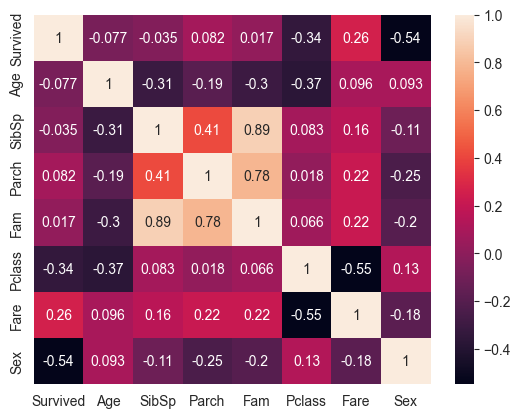

In [49]:
sns.heatmap(corr_mat.corr(), annot=True)
plt.show()